In [1]:
# !pip3.9 install openpyxl

In [2]:
# !pip3.9 install patsy

In [3]:
# !python3.9 -m pip install natsort

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Heiti TC']
import seaborn as sns
import numpy as np
import pylab
from datetime import date 
import scipy.stats as stats
from scipy.stats import shapiro,ttest_rel
from scipy.stats import pearsonr
from datetime import date, timedelta
import datetime
from natsort import natsorted
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2_contingency

In [5]:
for i in pd.read_excel("專業人員測驗題前測_202311060106_65483c0b70633.xlsx", sheet_name="前測").columns:
    print(i)

機構代碼
編號:
測驗日期:
題目1
題目2
題目3
題目4
題目5
題目6
題目7
題目8
題目9
題目10
題目11
題目12
題目13
題目14
題目15
題目16
題目17
題目18
題目19
題目20
題目21
題目22
題目23
題目24
題目25
題目26
題目27
題目28
題目29
題目30
題目31
題目32
題目33
題目34
題目35
題目36
題目37
題目38
題目39
題目40
題目41
題目42
題目43
題目44
題目45
題目46
題目47
題目48
題目49
題目50
1.1 出生年月：民國______年______月
1.2 性別：
1.3婚姻狀態(非必填)：
其他
1.4最高學歷：
1.5 職業(非必填):
1.6 現職工作年資:_______年________月(以點做區隔)
1.7總工作年資:_________年________月(以點做區隔)
1.8目前平均月收入約(非必填):
1.9宗教信仰(非必填)：
其他.1
1.10 吸菸習慣(非必填):
1.不吸菸，但有二手菸，每日吸到二手菸的時間約_______小時，已有______年 (以點做區隔)(非必填)
2.目前吸菸，已吸______年，平均每天______支 (以點做區隔)(非必填)
3.已戒菸，戒______年，以前每天約吸______支，吸________年 (以點做區隔)(非必填)
1.11 喝酒習慣(非必填):
1.目前喝酒，已喝______年，平均每天______CC，喝酒的種類:_________________________________(以點做區隔)(非必填)
2.已戒酒，戒______年，以前已喝__________年，平均每天______CC，喝酒的種類:__________________(以點做區隔)(非必填)
2.1高血壓
2.1.1是否服藥(非必填)
使用藥物名稱(非必填)
2.2糖尿病
2.2.1是否服藥(非必填)
使用藥物名稱(非必填).1
2.3血脂異常
2.3.1總膽固醇過高
2.3.1.1是否服藥(非必填)
使用藥物名稱(非必填).2
2.3.2三酸甘油酯過高
2.3.2.1是否服藥(非必填)
使用藥物名稱(非必填).3
2.3.3 高密度脂蛋白膽固醇過低
2.3.3.1是否服藥(非必填)
使用藥物名稱(非必填).4
2.

In [25]:
before = pd.read_excel("專業人員測驗題前測_202311060106_65483c0b70633.xlsx", sheet_name="前測", usecols=['編號:', 'Unnamed: 136', '1.1 出生年月：民國______年______月', '1.2 性別：', '1.5 職業(非必填):', '1.6 現職工作年資:_______年________月(以點做區隔)', '1.7總工作年資:_________年________月(以點做區隔)', '題目1', '題目2', '題目3', '題目4', '題目5', '題目6', '題目7', '題目8', '題目9', '題目10', '題目11', '題目12', '題目13', '題目14', '題目15', '題目16', '題目17', '題目18', '題目19', '題目20', '題目21', '題目22', '題目23', '題目24', '題目25', '題目26', '題目27', '題目28', '題目29', '題目30', '題目31', '題目32', '題目33', '題目34', '題目35', '題目36', '題目37', '題目38', '題目39', '題目40', '題目41', '題目42', '題目43', '題目44', '題目45', '題目46', '題目47', '題目48', '題目49', '題目50'], dtype={'1.6 現職工作年資:_______年________月(以點做區隔)': 'string', '1.7總工作年資:_________年________月(以點做區隔)':'string'})
before.rename(columns={'編號:': 'ID', 'Unnamed: 136':'前測', '1.1 出生年月：民國______年______月':'出生', '1.2 性別：':'性別', '1.5 職業(非必填):':'職業', '1.6 現職工作年資:_______年________月(以點做區隔)':'年資', '1.7總工作年資:_________年________月(以點做區隔)':'總工作年資'}, inplace=True)
before['出生'] = pd.to_datetime(before['出生']).apply(lambda x: x.date())
before['年齡'] = before['出生'].apply(lambda x:(date.today()-x)/timedelta(days=365.2425))
before['性別'] = before['性別'].replace(['0.女', '1.男'], ['女', '男'])
before['年資(y)'], before['年資(m)'] = before['年資'].str.split('.', n=1).str
before['年資(m)'] = before['年資(m)'].fillna(0)
before['年資(m)'] = before['年資(m)'].apply(lambda x:int(x)/12)
before['年資(y)'] = before['年資(y)'].astype(int)
before['年資'] = before['年資(y)']+before['年資(m)']
before['總工作年資(y)'], before['總工作年資(m)'] = before['總工作年資'].str.split('.', n=1).str
before['總工作年資(m)'] = before['總工作年資(m)'].fillna(0)
before['總工作年資(m)'] = before['總工作年資(m)'].apply(lambda x:int(x)/12)
before['總工作年資(y)'] = before['總工作年資(y)'].astype(int)
before['總工作年資'] = before['總工作年資(y)']+before['總工作年資(m)']
before['總工作年資'] = before['總工作年資'].apply(lambda x:round(x, 1))
before['年資'] = before['年資'].apply(lambda x:round(x, 1))
before['年齡'] = before['年齡'].apply(lambda x:round(x, 1))
before.drop_duplicates(inplace=True)
before = before.iloc[1:, :]

/var/folders/6f/v4g3dkkj0b54w0sc2l43bkqm0000gn/T/ipykernel_3720/3734171669.py:6: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  before['年資(y)'], before['年資(m)'] = before['年資'].str.split('.', n=1).str
/var/folders/6f/v4g3dkkj0b54w0sc2l43bkqm0000gn/T/ipykernel_3720/3734171669.py:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  before['總工作年資(y)'], before['總工作年資(m)'] = before['總工作年資'].str.split('.', n=1).str


In [26]:
after = pd.read_excel("專業人員測驗題前測_202311060106_65483c0b70633.xlsx", sheet_name="後測", usecols=['編號:', 'Unnamed: 64', '題目1', '題目2', '題目3', '題目4', '題目5', '題目6', '題目7', '題目8', '題目9', '題目10', '題目11', '題目12', '題目13', '題目14', '題目15', '題目16', '題目17', '題目18', '題目19', '題目20', '題目21', '題目22', '題目23', '題目24', '題目25', '題目26', '題目27', '題目28', '題目29', '題目30', '題目31', '題目32', '題目33', '題目34', '題目35', '題目36', '題目37', '題目38', '題目39', '題目40', '題目41', '題目42', '題目43', '題目44', '題目45', '題目46', '題目47', '題目48', '題目49', '題目50'])
after.rename(columns={'編號:': 'ID', 'Unnamed: 64':'後測'}, inplace=True)

In [27]:
df = pd.merge(before, after, on='ID')
first_cols = ['ID', '出生', '性別', '職業', '年資', '總工作年資', '年齡', '年資(y)', '年資(m)', '總工作年資(y)', '總工作年資(m)', '前測', '後測']
other_cols = natsorted(df.columns.difference(first_cols).tolist())
df = df.loc[:, first_cols+other_cols]
df

,ID,出生,性別,職業,年資,總工作年資,年齡,年資(y),年資(m),總工作年資(y),總工作年資(m),前測,後測,題目1_x,題目1_y,題目2_x,題目2_y,題目3_x,題目3_y,題目4_x,題目4_y,題目5_x,題目5_y,題目6_x,題目6_y,題目7_x,題目7_y,題目8_x,題目8_y,題目9_x,題目9_y,題目10_x,題目10_y,題目11_x,題目11_y,題目12_x,題目12_y,題目13_x,題目13_y,題目14_x,題目14_y,題目15_x,題目15_y,題目16_x,題目16_y,題目17_x,題目17_y,題目18_x,題目18_y,題目19_x,題目19_y,題目20_x,題目20_y,題目21_x,題目21_y,題目22_x,題目22_y,題目23_x,題目23_y,題目24_x,題目24_y,題目25_x,題目25_y,題目26_x,題目26_y,題目27_x,題目27_y,題目28_x,題目28_y,題目29_x,題目29_y,題目30_x,題目30_y,題目31_x,題目31_y,題目32_x,題目32_y,題目33_x,題目33_y,題目34_x,題目34_y,題目35_x,題目35_y,題目36_x,題目36_y,題目37_x,題目37_y,題目38_x,題目38_y,題目39_x,題目39_y,題目40_x,題目40_y,題目41_x,題目41_y,題目42_x,題目42_y,題目43_x,題目43_y,題目44_x,題目44_y,題目45_x,題目45_y,題目46_x,題目46_y,題目47_x,題目47_y,題目48_x,題目48_y,題目49_x,題目49_y,題目50_x,題目50_y
0,89,1985-04-19,女,照服員,16.0,16.0,38.6,16,0.000000,16,0.00,48,50,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,X,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,X,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
1,90,1988-10-26,女,護理師,9.0,9.0,35.1,9,0.000000,9,0.00,49,50,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,X,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
2,91,1951-09-02,女,護理師,6.0,12.0,72.3,6,0.000000,12,0.00,50,50,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
3,92,1950-11-22,女,照服員,16.0,25.0,73.0,16,0.000000,25,0.00,49,50,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,X,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
4,93,1842-10-19,男,護理師,12.0,16.0,181.1,12,0.000000,16,0.00,49,49,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,X,X,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,84,1976-09-03,女,照服員,21.5,21.5,47.2,21,0.500000,21,0.50,50,50,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
95,85,1954-07-14,男,照服員,13.0,25.0,69.4,13,0.000000,25,0.00,50,50,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
96,86,1956-04-23,女,照服員,24.7,54.0,67.6,24,0.666667,54,0.00,50,50,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
97,87,1950-05-13,男,其他,24.0,38.2,73.6,24,0.000000,38,0.25,50,50,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O


In [28]:
# 顯示連續變量欄位的分佈
df.describe()

,ID,年資,總工作年資,年齡,年資(y),年資(m),總工作年資(y),總工作年資(m),前測,後測
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,55.828283,7.459596,16.366667,48.417172,7.202020,0.254209,16.202020,0.160774,49.101010,49.636364
std,32.927577,7.175908,12.679052,22.349844,7.242138,0.275968,12.753535,0.248651,1.574639,0.919789
min,1.000000,0.200000,0.200000,0.300000,0.000000,0.000000,0.000000,0.000000,43.000000,45.000000
25%,25.500000,2.150000,6.700000,37.100000,2.000000,0.000000,6.500000,0.000000,49.000000,50.000000
50%,60.000000,5.500000,14.800000,46.300000,5.000000,0.166667,14.000000,0.000000,50.000000,50.000000
75%,84.500000,10.150000,20.350000,57.600000,10.000000,0.500000,20.000000,0.208333,50.000000,50.000000
max,109.000000,44.000000,55.000000,181.100000,44.000000,0.916667,55.000000,0.916667,50.000000,50.000000


In [29]:
# 顯示類別變量欄位的分佈
df.describe(include='object')

,出生,性別,職業,題目1_x,題目1_y,題目2_x,題目2_y,題目3_x,題目3_y,題目4_x,題目4_y,題目5_x,題目5_y,題目6_x,題目6_y,題目7_x,題目7_y,題目8_x,題目8_y,題目9_x,題目9_y,題目10_x,題目10_y,題目11_x,題目11_y,題目12_x,題目12_y,題目13_x,題目13_y,題目14_x,題目14_y,題目15_x,題目15_y,題目16_x,題目16_y,題目17_x,題目17_y,題目18_x,題目18_y,題目19_x,題目19_y,題目20_x,題目20_y,題目21_x,題目21_y,題目22_x,題目22_y,題目23_x,題目23_y,題目24_x,題目24_y,題目25_x,題目25_y,題目26_x,題目26_y,題目27_x,題目27_y,題目28_x,題目28_y,題目29_x,題目29_y,題目30_x,題目30_y,題目31_x,題目31_y,題目32_x,題目32_y,題目33_x,題目33_y,題目34_x,題目34_y,題目35_x,題目35_y,題目36_x,題目36_y,題目37_x,題目37_y,題目38_x,題目38_y,題目39_x,題目39_y,題目40_x,題目40_y,題目41_x,題目41_y,題目42_x,題目42_y,題目43_x,題目43_y,題目44_x,題目44_y,題目45_x,題目45_y,題目46_x,題目46_y,題目47_x,題目47_y,題目48_x,題目48_y,題目49_x,題目49_y,題目50_x,題目50_y
count,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99
unique,96,2,5,1,1,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,1,2,2,1,1,1,1,1,1,1,1,1,2,1,2,2,2,1,2,1,2,1,2,2,1,1,2,2,2,1,2,1,2,2,1,1,1,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,2,1,2,2,2,1,1,1,2,1,1,1,2,1,1,1,2,2,1,1,2,1
top,1999-02-13,女,照服員,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
freq,2,76,36,99,99,99,99,98,99,94,97,97,98,98,97,98,98,95,98,96,98,92,95,98,96,99,99,95,97,99,97,98,99,99,99,99,99,99,99,99,99,98,99,78,88,95,99,96,99,98,99,96,98,99,99,97,98,96,99,98,99,92,98,99,99,99,99,95,98,99,99,99,99,99,99,98,99,99,99,99,99,98,99,98,98,98,99,99,99,98,99,99,99,98,99,99,99,97,98,99,99,98,99


([<matplotlib.patches.Wedge at 0x12a6594f0>,
 [Text(-0.8197909015797102, 0.7334458928149548, '女'),
  Text(0.81979090157971, -0.7334458928149549, '男')],
 [Text(-0.4471586735889328, 0.40006139608088437, '76.8%\n(76)'),
  Text(0.44715867358893274, -0.4000613960808845, '23.2%\n(23)')])

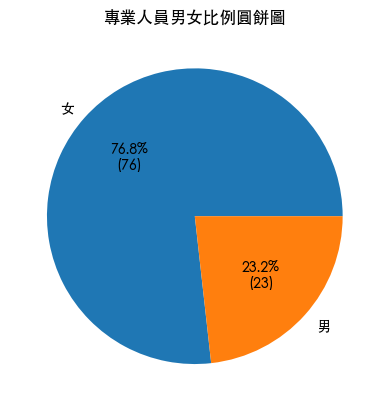

In [30]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = df['性別'].value_counts()
plt.title('專業人員男女比例圓餅圖')
plt.pie(s,labels = s.index, autopct=autopct_format(s))

([<matplotlib.patches.Wedge at 0x12a69b760>,
 [Text(0.4569564802357173, 1.000595210447554, '照服員'),
  Text(-1.064743552202115, -0.27626286041381354, '護理師'),
  Text(0.42497971358497094, -1.014589691964804, '其他'),
  Text(1.0077193356037843, -0.44102351484956853, '社工'),
  Text(1.0911503039085977, -0.1392516221814857, '護理師\t')],
 [Text(0.24924898921948213, 0.5457792056986657, '36.4%\n(36)'),
  Text(-0.5807692102920626, -0.15068883295298918, '35.4%\n(35)'),
  Text(0.23180711650089322, -0.5534125592535295, '19.2%\n(19)'),
  Text(0.5496650921475187, -0.24055828082703734, '5.1%\n(5)'),
  Text(0.5951728930410531, -0.07595543028081038, '4.0%\n(4)')])

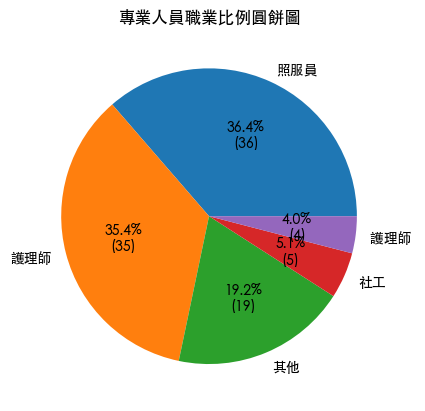

In [31]:
s = df['職業'].value_counts()
plt.title('專業人員職業比例圓餅圖')
plt.pie(s,labels = s.index, autopct=autopct_format(s))

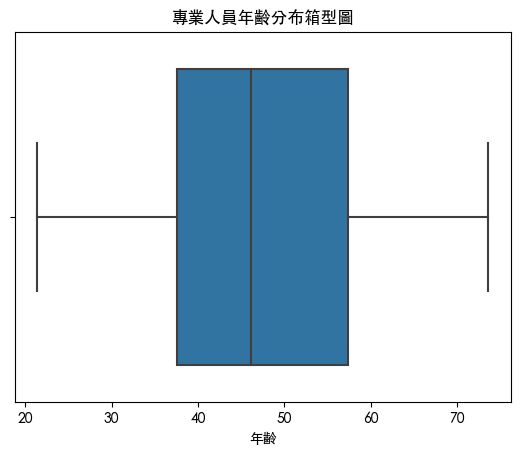

In [32]:
tmp = df[(df['年齡']<100)&(df['年齡']>18)]
sns.boxplot(x=tmp["年齡"],data=tmp)
plt.title("專業人員年齡分布箱型圖")
plt.show()

Text(0.5, 1.0, '專業人員年齡分布直方圖')

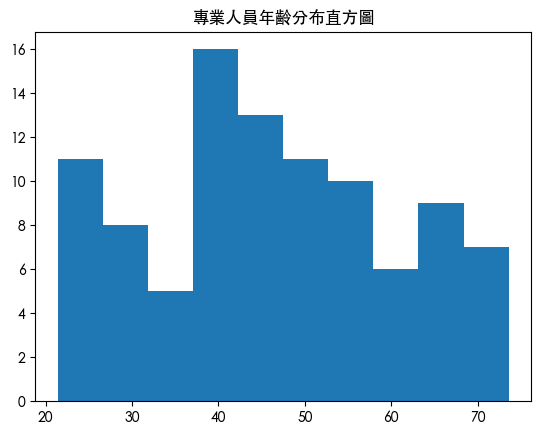

In [33]:
plt.hist(tmp['年齡'])
plt.title("專業人員年齡分布直方圖")

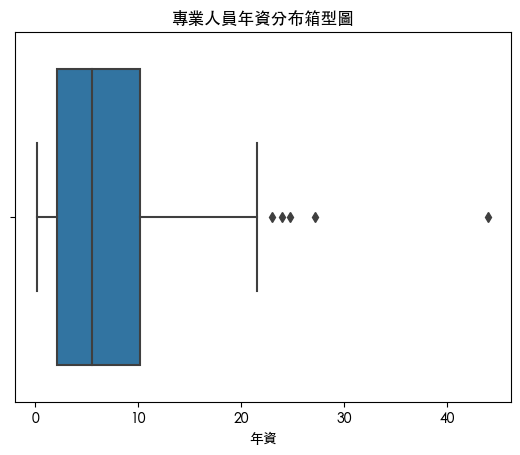

In [34]:
sns.boxplot(x=df["年資"],data=df)
plt.title("專業人員年資分布箱型圖")
plt.show()

Text(0.5, 1.0, '專業人員年資分布直方圖')

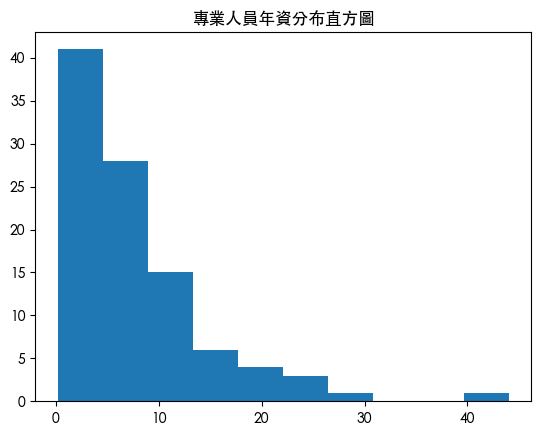

In [35]:
plt.hist(df['年資'])
plt.title("專業人員年資分布直方圖")

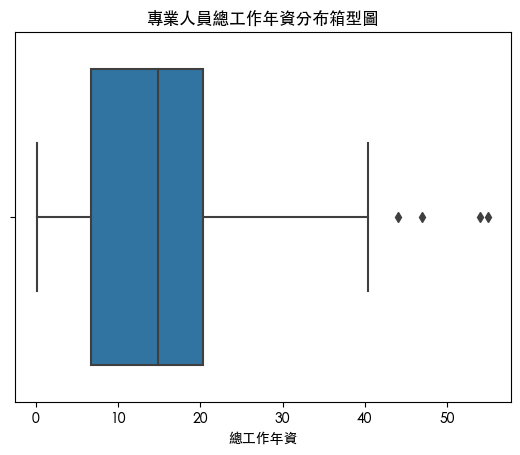

In [36]:
sns.boxplot(x=df["總工作年資"],data=df)
plt.title("專業人員總工作年資分布箱型圖")
plt.show()

Text(0.5, 1.0, '專業人員總工作年資分布直方圖')

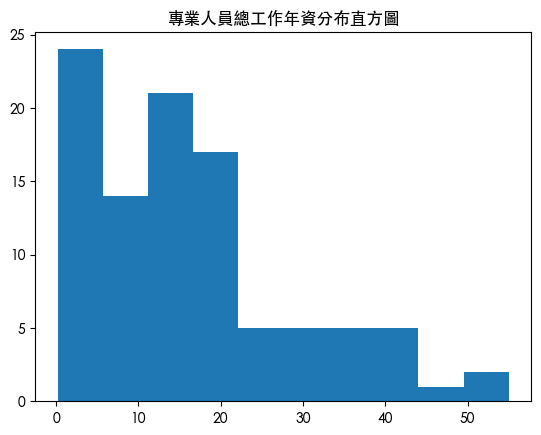

In [37]:
plt.hist(df['總工作年資'])
plt.title("專業人員總工作年資分布直方圖")

對於前後測的資料，特別是在考慮學習狀況是否有進步的情況下，可以使用 McNemar 測試。<br>
McNemar 測試是一種用於分析配對資料的非參數統計檢定，特別適用於二元資料，例如答對或答錯的情況。

在 McNemar 測試中，對每個配對的樣本觀察四個數字：

    a：前後都答對的次數
    b：前測答對，後測答錯的次數
    c：前測答錯，後測答對的次數
    d：前後都答錯的次數

McNemar 測試的虛無假設是 b = c，即前後測的答對和答錯的次數分布相等。

In [17]:
target = []
for i in range(1, 51):
    target.append(f'題目{i}')
for i in target:
    print(i)
    X = f'{i}_x'
    Y = f'{i}_y'
    print('前測答對人數', str(len(df[df[X]=='O'])))
    print('後測答對人數', str(len(df[df[Y]=='O'])))
    # 創建二分類的列聯表
    contingency_table = [[len(df[(df[X]=='O')&(df[Y]=='O')]), len(df[(df[X]=='O')&(df[Y]=='X')])],
                        [len(df[(df[X]=='X')&(df[Y]=='O')]), len(df[(df[X]=='X')&(df[Y]=='X')])]] 

    # 執行 McNemar 檢定
    result = mcnemar(contingency_table)

    # 顯示結果
    print("McNemar statistic:", result.statistic)
    print("P-value:", result.pvalue)

    # 判斷結果是否顯著
    alpha = 0.05
    if result.pvalue < alpha:
        print("統計上顯著，可以拒絕虛無假設，表示學習狀況有進步。")
    else:
        print("統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。")
    print('='*50)

題目1
前測答對人數 99
後測答對人數 99
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目2
前測答對人數 99
後測答對人數 99
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目3
前測答對人數 98
後測答對人數 99
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目4
前測答對人數 94
後測答對人數 97
McNemar statistic: 2.0
P-value: 0.453125
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目5
前測答對人數 97
後測答對人數 98
McNemar statistic: 1.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目6
前測答對人數 98
後測答對人數 97
McNemar statistic: 1.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目7
前測答對人數 98
後測答對人數 98
McNemar statistic: 1.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目8
前測答對人數 95
後測答對人數 98
McNemar statistic: 1.0
P-value: 0.375
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目9
前測答對人數 96
後測答對人數 98
McNemar statistic: 1.0
P-value: 0.625
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目10
前測答對人數 92
後測答對人數 95
McNemar statistic: 3.0
P-value: 0.5078125
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目11
前測答對人數 98
後測答對人數 96
McNemar statistic: 1.0
P-value: 0.625
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目

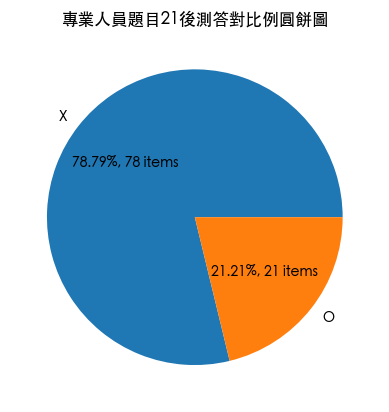

In [18]:
plt.figure()
values = df['題目21_x'].value_counts()
labels = df['題目21_x'].unique()
plt.pie(values, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(values)/100 :.0f} items')
plt.title('專業人員題目21後測答對比例圓餅圖')
plt.show()

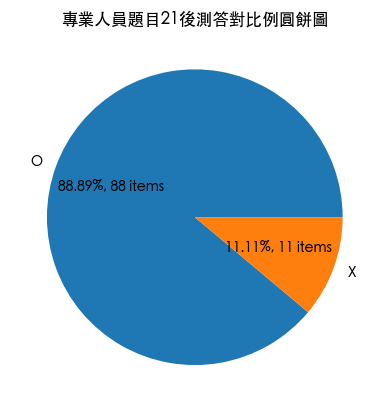

In [19]:
plt.figure()
values = df['題目21_y'].value_counts()
labels = df['題目21_y'].unique()
plt.pie(values, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(values)/100 :.0f} items')
plt.title('專業人員題目21後測答對比例圓餅圖')
plt.show()

In [20]:
for i in target:
    try:
        print(i)
        X = f'{i}_x'
        Y = f'{i}_y'
        print('前測答對人數', str(len(df[df[X]=='O'])))
        print('後測答對人數', str(len(df[df[Y]=='O'])))
        # 創建二分類的列聯表
        contingency_table = [[len(df[(df[X]=='O')&(df[Y]=='O')]), len(df[(df[X]=='O')&(df[Y]=='X')])],
                            [len(df[(df[X]=='X')&(df[Y]=='O')]), len(df[(df[X]=='X')&(df[Y]=='X')])]] 
        # 執行卡方檢定
        result = chi2_contingency(contingency_table)

        # 顯示結果
        print("Chi-squared statistic:", result.statistic)
        print("P-value:", result.pvalue)

        # 判斷結果是否顯著
        alpha = 0.05
        if result.pvalue < alpha:
            print("統計上顯著，可以拒絕虛無假設，表示學習狀況有改善。")
        else:
            print("統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。")
    except:
        pass
    print('='*50)


題目1
前測答對人數 99
後測答對人數 99
題目2
前測答對人數 99
後測答對人數 99
題目3
前測答對人數 98
後測答對人數 99
題目4
前測答對人數 94
後測答對人數 97
Chi-squared statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目5
前測答對人數 97
後測答對人數 98
Chi-squared statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目6
前測答對人數 98
後測答對人數 97
Chi-squared statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目7
前測答對人數 98
後測答對人數 98
Chi-squared statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目8
前測答對人數 95
後測答對人數 98
Chi-squared statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目9
前測答對人數 96
後測答對人數 98
Chi-squared statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目10
前測答對人數 92
後測答對人數 95
Chi-squared statistic: 0.18700044949329853
P-value: 0.6654249315854527
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目11
前測答對人數 98
後測答對人數 96
Chi-squared statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目12
前測答對人數 99
後測答對人數 99
題目13
前測答對人數 95
後測答對人數 97
Chi-squared statistic: 2.3128425122083556
P-value: 0.12830921968531384
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題

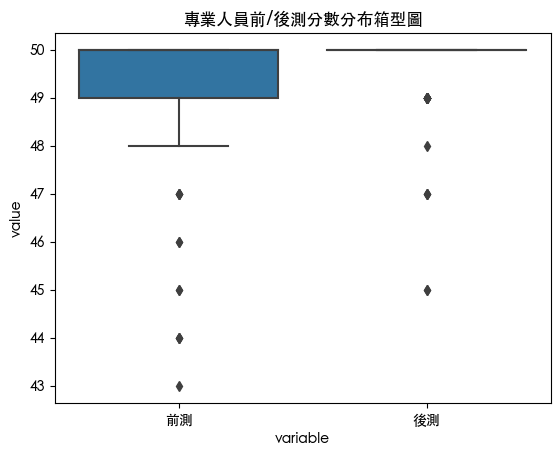

In [21]:
sns.boxplot(x="variable", y="value", data=pd.melt(df[['前測', '後測']]))
plt.title("專業人員前/後測分數分布箱型圖")
plt.show()

判斷使用 Wilcoxon Signed-Rank Test 還是 Paired t-test 的檢驗方法通常取決於資料的分佈和假設是否滿足。以下是一些建議：
* 使用 Wilcoxon Signed-Rank Test 的情況：

    1. 資料不符合常態分佈：
        如果資料呈現明顯的偏態或嚴重的不對稱，可能不滿足 t-test 的常態分佈假設。Wilcoxon Signed-Rank Test 是一種非參數方法，對於不符合常態分佈的資料較為適用。

    2. 資料有極端值或離群值：
        Wilcoxon Signed-Rank Test 對於極端值或離群值較不敏感，因此當資料中存在這類值時，考慮使用 Wilcoxon Signed-Rank Test。

    3. 資料為等距分數或順序資料：
        Wilcoxon Signed-Rank Test 對於等距分數或順序資料的處理效果較好。如果你的資料是等距分數或順序資料，Wilcoxon Signed-Rank Test 可能是更合適的選擇。

* 使用 Paired t-test 的情況：

    1. 資料符合常態分佈：
        如果成對資料呈現近似常態分佈，且樣本量足夠大（通常 n > 30 可以考慮），那麼使用 Paired t-test 可能是一個合適的選擇。

    2. 樣本量足夠大：
        Paired t-test 對於較大的樣本量更為適用。當樣本量足夠大時，中央極限定理可以使得 t-test 對於不符合常態分佈的資料也較為鬆弛。

In [22]:
from scipy.stats import wilcoxon

# 使用 Wilcoxon 符號秩測試 雙尾檢定
statistic, p_value = wilcoxon(df['前測'].tolist(),  df['後測'].tolist(), alternative='two-sided')

# 顯示結果
print("Wilcoxon statistic:", statistic)
print("P-value:", p_value)

# 判斷結果是否顯著
alpha = 0.05
if p_value < alpha:
    print("統計上顯著，可以拒絕虛無假設，表示前後測有差異。")
else:
    print("統計上不顯著，不能拒絕虛無假設，表示前後測無差異。")


Wilcoxon statistic: 149.5
P-value: 0.00019288696510024296
統計上顯著，可以拒絕虛無假設，表示前後測有差異。
